# Mystery, Thriller & Crime Books
## Goodreads Book Graph Datasets

Courtsey of Mengting Wan
Citation:
* Mengting Wan, Julian McAuley, "Item Recommendation on Monotonic Behavior Chains", in RecSys'18.
* Mengting Wan, Rishabh Misra, Ndapa Nakashole, Julian McAuley, "Fine-Grained Spoiler Detection from Large-Scale Review Corpora", in ACL'19.

## Load Data

In [1]:
# packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# need to load data...
# data = pd.read_json(
#     "goodreads_books_mystery_thriller_crime.json",
#     lines=True,
# )

In [3]:
data.sample(n=5)

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
145981,0764205609,215,[509640],US,en-US,"[{'count': '2015', 'name': 'to-read'}, {'count...",,false,3.49,B00B5JKLRW,...,,,,https://www.goodreads.com/book/show/5103695-el...,https://images.gr-assets.com/books/1267307488m...,5103695,1528,5170459,Elisha's Bones (Jack Hawthorne Adventure #1),Elisha's Bones (Jack Hawthorne Adventure #1)
10273,0590453874,35,[1099021],US,,"[{'count': '300', 'name': 'to-read'}, {'count'...",,false,3.59,,...,8,,1993,https://www.goodreads.com/book/show/176475.The...,https://s.gr-assets.com/assets/nophoto/book/11...,176475,654,26229442,The Dead Girlfriend,The Dead Girlfriend
97167,,10,[962103],US,,"[{'count': '320', 'name': 'to-read'}, {'count'...",B01MSWZ1C2,true,4.12,B01MSWZ1C2,...,,,,https://www.goodreads.com/book/show/33578710-w...,https://s.gr-assets.com/assets/nophoto/book/11...,33578710,105,52601307,Warped Ambition (A Jo Riskin Mystery Book 1),Warped Ambition (A Jo Riskin Mystery Book 1)
38797,,2,[],US,slo,"[{'count': '12655', 'name': 'to-read'}, {'coun...",,false,3.98,,...,7,,2016,https://www.goodreads.com/book/show/31685658-n...,https://images.gr-assets.com/books/1472238000m...,31685658,5,26186624,Naslepo,Naslepo
82893,,7,[],US,por,"[{'count': '1349', 'name': 'to-read'}, {'count...",,false,3.81,,...,3,,2013,https://www.goodreads.com/book/show/17562797-a...,https://images.gr-assets.com/books/1362678651m...,17562797,55,11286470,A Confissão,A Confissão


## Exploratory Data Analysis

In [4]:
# no. of observations & features
data.shape

(219235, 29)

In [5]:
# check for missing data
data.isnull().sum()

isbn                    0
text_reviews_count      0
series                  0
country_code            0
language_code           0
popular_shelves         0
asin                    0
is_ebook                0
average_rating          0
kindle_asin             0
similar_books           0
description             0
format                  0
link                    0
authors                 0
publisher               0
num_pages               0
publication_day         0
isbn13                  0
publication_month       0
edition_information     0
publication_year        0
url                     0
image_url               0
book_id                 0
ratings_count           0
work_id                 0
title                   0
title_without_series    0
dtype: int64

In [6]:
# structure
data.dtypes

isbn                     object
text_reviews_count        int64
series                   object
country_code             object
language_code            object
popular_shelves          object
asin                     object
is_ebook                 object
average_rating          float64
kindle_asin              object
similar_books            object
description              object
format                   object
link                     object
authors                  object
publisher                object
num_pages                object
publication_day          object
isbn13                   object
publication_month        object
edition_information      object
publication_year         object
url                      object
image_url                object
book_id                   int64
ratings_count             int64
work_id                   int64
title                    object
title_without_series     object
dtype: object

In [7]:
# summary stas for numeric columns (not really useful in this instance)
data.describe()

,text_reviews_count,average_rating,book_id,ratings_count,work_id
count,219235.000000,219235.000000,2.192350e+05,2.192350e+05,2.192350e+05
mean,36.715333,3.831517,1.517214e+07,5.239024e+02,1.800565e+07
std,370.819165,0.332023,1.057262e+07,9.129935e+03,1.831656e+07
min,0.000000,0.000000,1.640000e+02,0.000000e+00,1.370000e+02
25%,2.000000,3.650000,6.339338e+06,1.000000e+01,1.771542e+06
50%,6.000000,3.850000,1.573438e+07,3.500000e+01,1.337982e+07
75%,17.000000,4.040000,2.360379e+07,1.280000e+02,2.711272e+07
max,78438.000000,5.000000,3.651716e+07,2.046499e+06,5.837010e+07


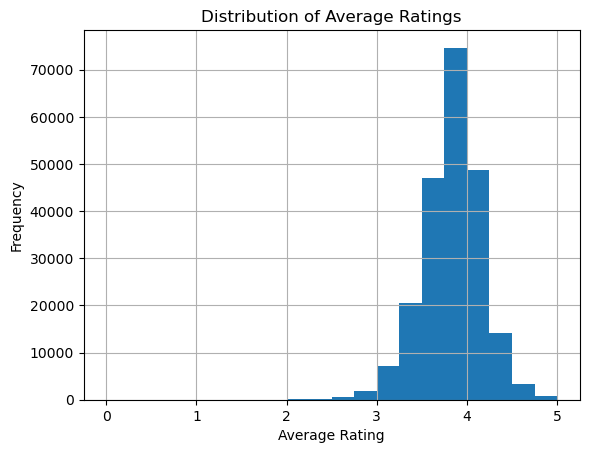

In [8]:
# histogram for average ratings
data["average_rating"].hist(bins=20)

# label & title
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Average Ratings")

# display
plt.show()
plt.close()

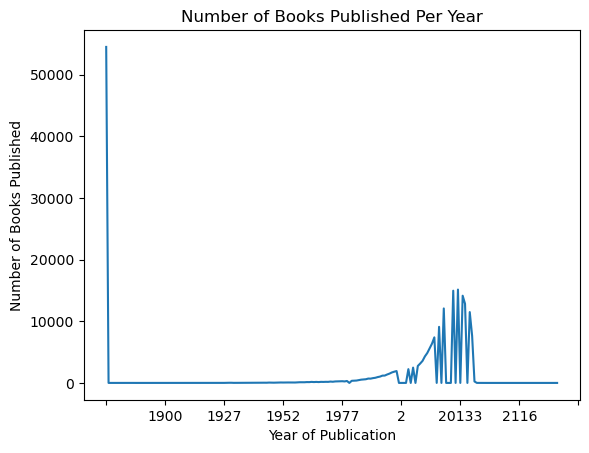

In [9]:
# no. of books published per year
data["publication_year"].value_counts().sort_index().plot(kind="line")

# label & title
plt.xlabel("Year of Publication")
plt.ylabel("Number of Books Published")
plt.title("Number of Books Published Per Year")

plt.show()
plt.close()

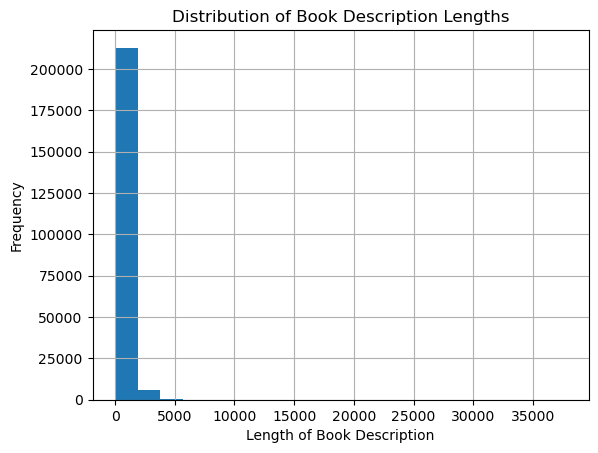

In [10]:
# check the length of book descriptions
data["description_length"] = data["description"].apply(len)
data["description_length"].hist(bins=20)

# labels & title
plt.xlabel("Length of Book Description")
plt.ylabel("Frequency")
plt.title("Distribution of Book Description Lengths")

# display
plt.show()
plt.close()